In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf 


In [4]:
df = yf.download('AAPL', start='2012-01-01', end='2024-12-17')

print(df)

df.to_csv('AAPL_data.csv')

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2012-01-03   12.388999   14.686786   14.732143   14.607143   14.621429   
2012-01-04   12.455577   14.765714   14.810000   14.617143   14.642857   
2012-01-05   12.593859   14.929643   14.948214   14.738214   14.819643   
2012-01-06   12.725511   15.085714   15.098214   14.972143   14.991786   
2012-01-09   12.705324   15.061786   15.276786   15.048214   15.196429   
...                ...         ...         ...         ...         ...   
2024-12-10  247.770004  247.770004  248.210007  245.339996  246.889999   
2024-12-11  246.490005  246.490005  250.800003  246.259995  247.960007   
2024-12-12  247.960007  247.960007  248.740005  245.679993  246.889999   
2024-12-13  248.130005  248.130005  249.289993  246.240005  247.820007   
2024-12-16  251.039993  251.039993  25

In [ ]:
df.shape

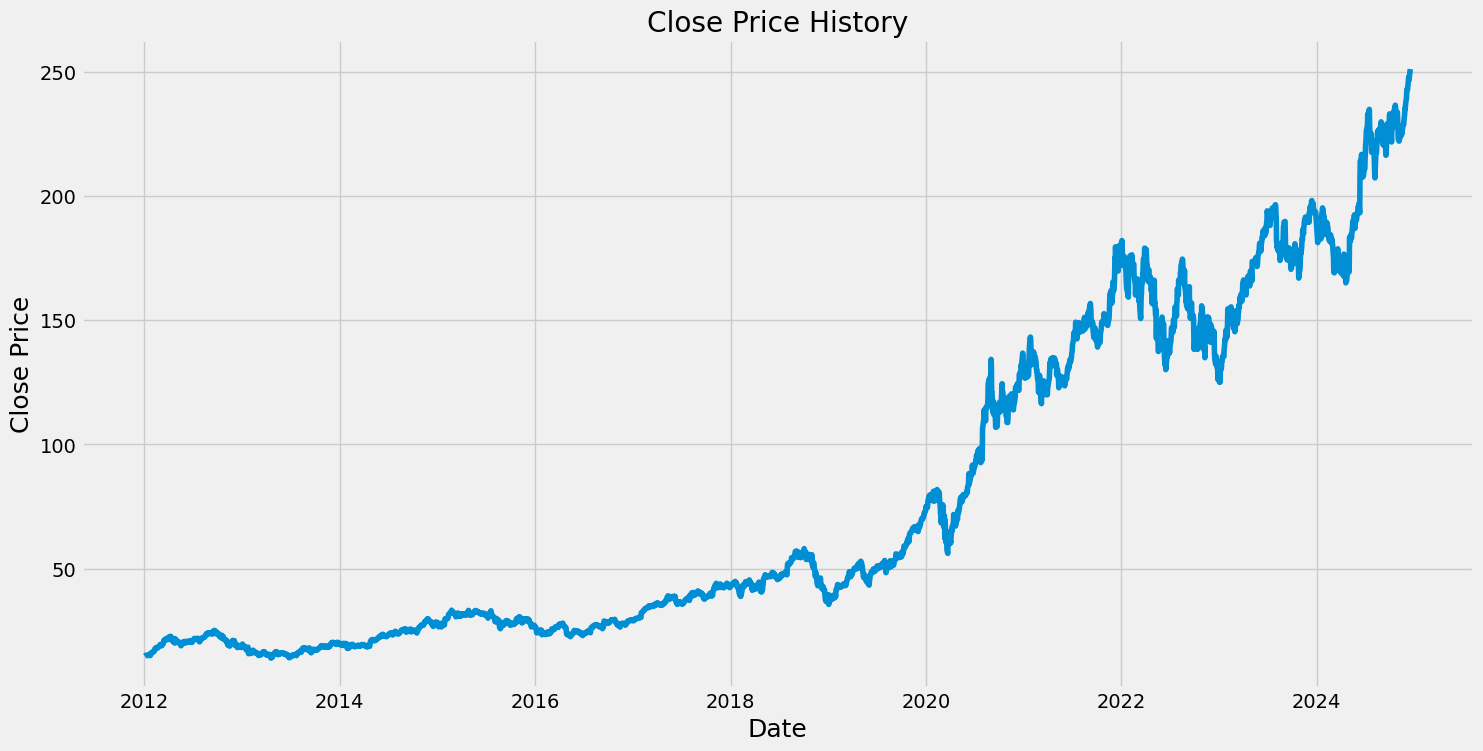

In [5]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])  
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)* .8)

training_data_len

In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)


In [ ]:
train_data= scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

In [ ]:
x_train, y_train=np.array(x_train), np.array(y_train)

In [ ]:
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

In [ ]:


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(50, return_sequences=False))  
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [84]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
test_data= scaled_data[training_data_len - 60: , :]

x_test= []
y_test= dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test=np.array(x_test)


In [ ]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction= model.predict(x_test)
prediction= scaler.inverse_transform(prediction)

In [ ]:
rmse= np.sqrt(np.mean(prediction-y_test)**2)
rmse

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction



In [ ]:


plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close prize', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','prediction']])
plt.legend(['train','val','prediction'], loc='lower right')
plt.show 

In [ ]:
valid

In [ ]:
apple_quote= yf.download('AAPL', start='2012-01-01', end='2024-12-17')

new_df=apple_quote.filter(['close'])

last_60_days=new_df[-60:].values

last_60_days_scaled= scaler.transform(last_60_days)

x_test=[]

x_test.append(last_60_days_scaled)

x_test=np.array(X_test)

x_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
apple_quote2=yf.download('AAPL', start='2024-12-18', end='2024-12-18')
print(apple_quote2['close'])